In [5]:
import time
import random
import numpy as np
import importlib

import sys
sys.path.append("../../")

In [6]:
from qiskit import QuantumProgram
import Qconfig

In [9]:
import tools.Experiment_tools as exptool

In [10]:
importlib.reload(exptool)

<module 'tools.Experiment_tools' from '/Users/cvuillot/Work/Programming/IBMQE/qiskit-sdk-py/examples/experimenting_with_fault_tolerance/tools/Experiment_tools.py'>

In [11]:
qprogram = QuantumProgram()
qprogram.set_api(Qconfig.APItoken, Qconfig.config["url"])

In [12]:
api = qprogram.get_api()

In [13]:
qprogram.available_backends()

['ibmqx4',
 'ibmqx2',
 'ibmqx5',
 'ibmqx_qasm_simulator',
 'local_qasm_simulator',
 'local_unitary_simulator']

In [14]:
print(qprogram.get_backend_status("ibmqx4"))
api.get_my_credits()

{'available': True, 'busy': False, 'pending_jobs': 0, 'backend': 'ibmqx4'}


{'maxUserType': 150, 'promotional': 100, 'remaining': 150}

In [15]:
config = qprogram.get_backend_configuration("ibmqx4",list_format=True)
config

{'basis_gates': 'SU2+CNOT',
 'chip_name': 'Raven',
 'coupling_map': [[1, 0], [2, 0], [2, 1], [2, 4], [3, 2], [3, 4]],
 'description': '5 qubit transmon bowtie chip 3',
 'n_qubits': 5,
 'name': 'ibmqx4',
 'online_date': '2017-09-18T11:00:00.000Z',
 'simulator': False,
 'url': 'https://ibm.biz/qiskit-ibmqx4',
 'version': '1'}

In [16]:
n = config['n_qubits']
q = qprogram.create_quantum_register("q",n)
c = qprogram.create_classical_register("c",n)

In [17]:
circuit_names = exptool.all_circuits(qprogram,config['coupling_map'])

In [58]:
rand_perm_names = np.random.permutation(circuit_names)
batches = [list(rand_perm_names[50*j:50*(j+1)]) for j in range(0,1+int(len(circuit_names)/50))]

compiled_qobj_list = [qprogram.compile(batch, 
                                       backend='ibmqx4', 
                                       config=None,
                                       silent=False, 
                                       basis_gates=None, 
                                       coupling_map=None, 
                                       initial_layout=None, 
                                       shots=8192, 
                                       max_credits=5, 
                                       seed=None) for batch in batches]

In [59]:
qprogram.run_batch_async(compiled_qobj_list, wait=10, timeout=30, silent=True, callback=exptool.post_treatment_list)

In [97]:
print(qprogram.get_backend_status("ibmqx4"))
api.get_my_credits()

{'available': True, 'busy': False, 'pending_jobs': 102, 'backend': 'ibmqx4'}


{'maxUserType': 150, 'promotional': 100, 'remaining': 65}

In [98]:
print(exptool.fetch_previous('timed_out.txt',api))
print(exptool.fetch_previous('completed.txt',api))

16
0


In [99]:
dict_cn = exptool.get_qasm_name_dict(compiled_qobj_list)

In [100]:
print(exptool.process_all_api_dumps('data/completed_timed_out.txt','data/already_processed.txt',dict_cn))

16


In [93]:
importlib.reload(exptool)
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [94]:
#exptool.plot_everything_binned('data/Processed_data/')

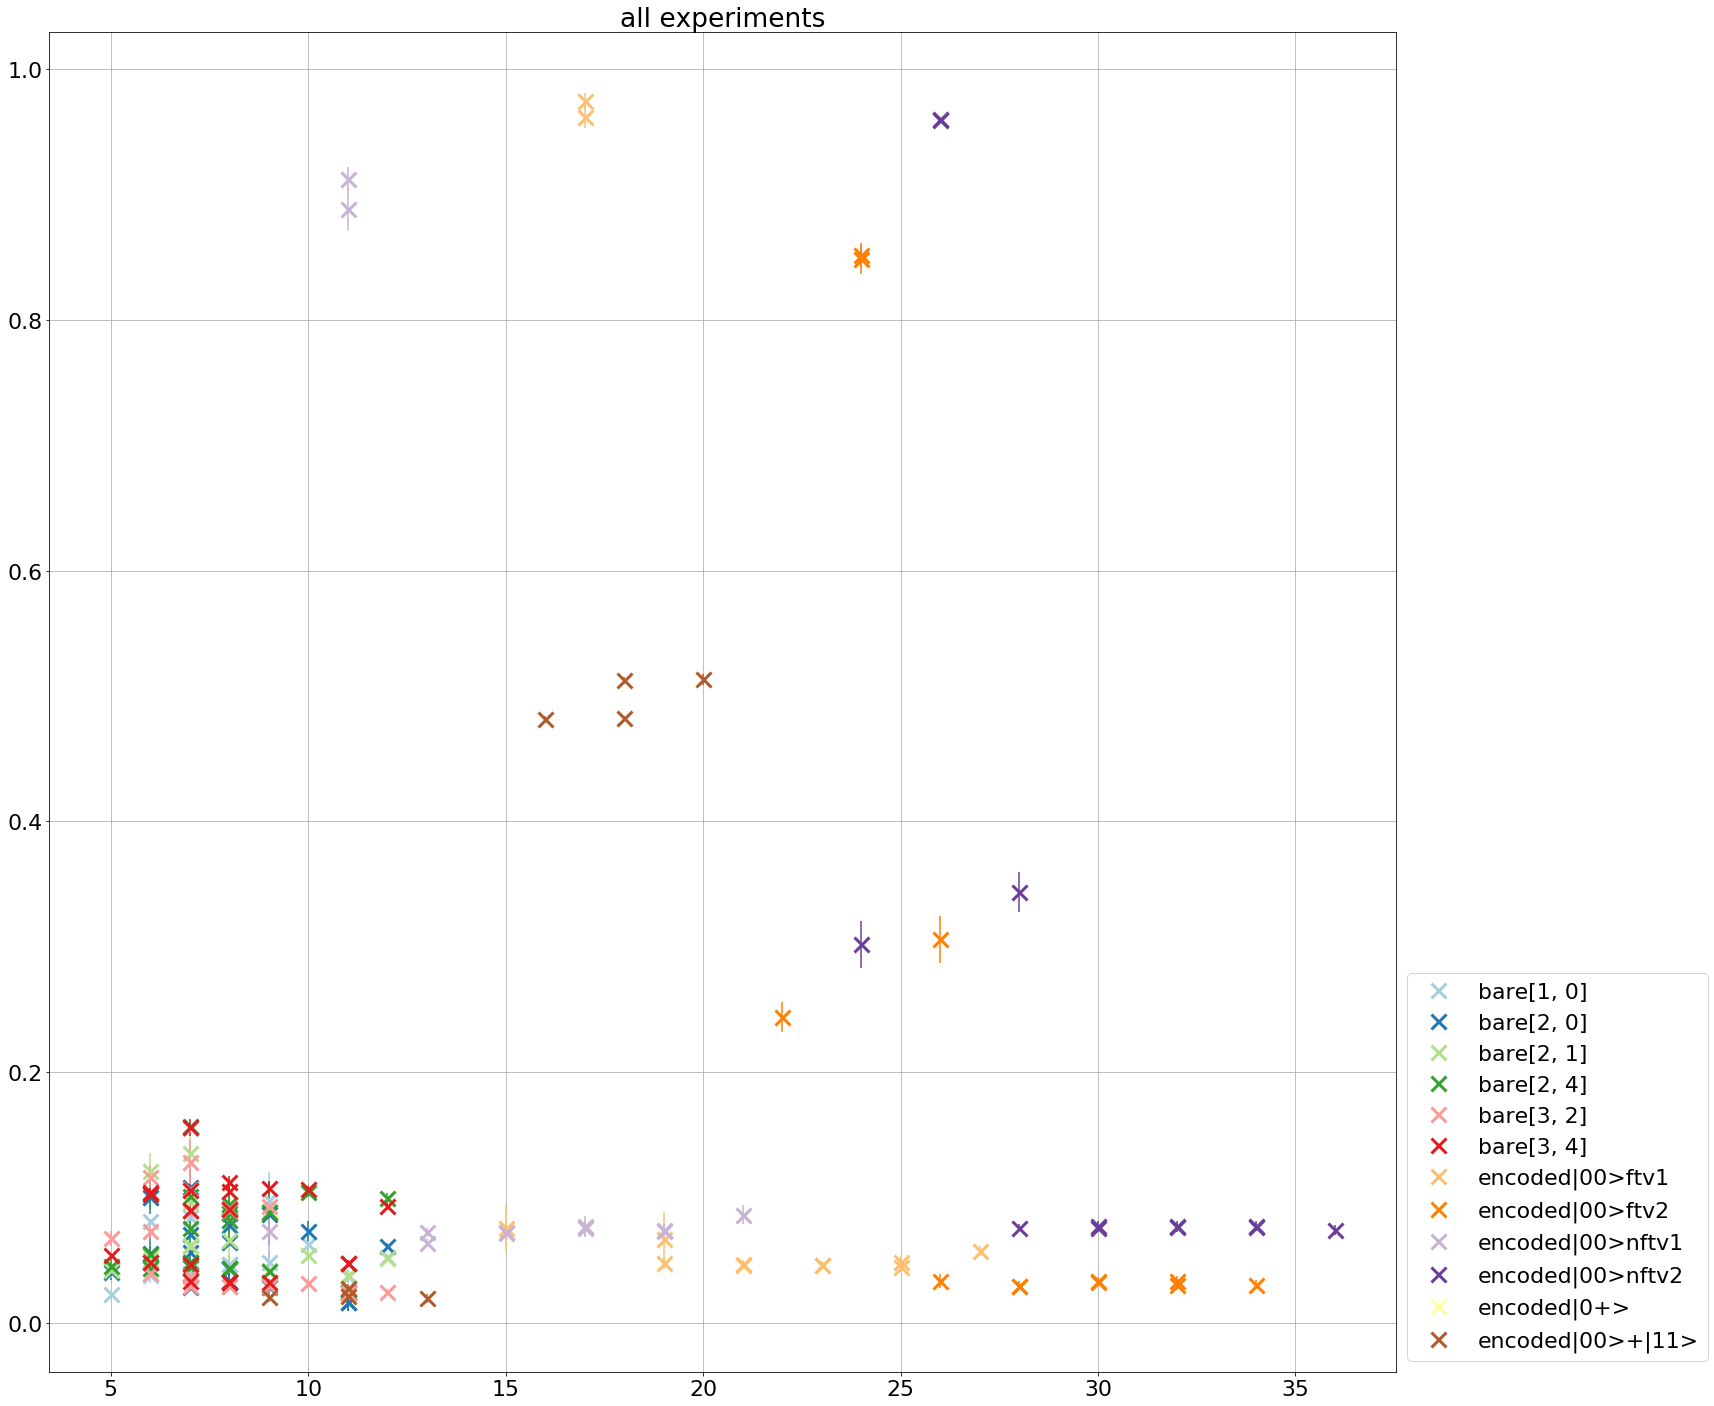

0 22185


In [96]:
exptool.plot_everything_averaged('data/Processed_data/', logscaley=False)

In [88]:
#exptool.plot_everything_averaged_bare_ranked('data/Processed_data/')

In [69]:
import os

In [70]:
importlib.reload(exptool)

<module 'tools.Experiment_tools' from '/Users/cvuillot/Work/Programming/IBMQE/qiskit-sdk-py/examples/experimenting_with_fault_tolerance/tools/Experiment_tools.py'>

In [81]:
file_list = os.listdir('data/Processed_data/')
n=0
for filename in file_list:
    n += exptool.repair_processed_data('data/Processed_data/'+filename, new_ext='')
print(n)

123


In [1]:
calib = {'lastUpdateDate': '2017-10-10T11:02:10.000Z', 'fridgeParameters': {'cooldownDate': '2017-09-07', 'Temperature': {'date': '2017-10-10T11:02:10Z', 'value': 0.021, 'unit': 'K'}}, 'qubits': [{'name': 'Q0', 'buffer': {'date': '2017-10-10T11:02:10Z', 'value': 10, 'unit': 'ns'}, 'gateTime': {'date': '2017-10-10T11:02:10Z', 'value': 50, 'unit': 'ns'}, 'T2': {'date': '2017-10-10T11:02:10Z', 'value': 50, 'unit': 'µs'}, 'T1': {'date': '2017-10-10T11:02:10Z', 'value': 58.6, 'unit': 'µs'}, 'frequency': {'date': '2017-10-10T11:02:10Z', 'value': 5.24613, 'unit': 'GHz'}, 'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.000858490762927322}, 'readoutError': {'date': '2017-10-10T11:02:10Z', 'value': 0.035}}, {'name': 'Q1', 'buffer': {'date': '2017-10-10T11:02:10Z', 'value': 10, 'unit': 'ns'}, 'gateTime': {'date': '2017-10-10T11:02:10Z', 'value': 50, 'unit': 'ns'}, 'T2': {'date': '2017-10-10T11:02:10Z', 'value': 53.7, 'unit': 'µs'}, 'T1': {'date': '2017-10-10T11:02:10Z', 'value': 65, 'unit': 'µs'}, 'frequency': {'date': '2017-10-10T11:02:10Z', 'value': 5.30262, 'unit': 'GHz'}, 'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.0013737021608475342}, 'readoutError': {'date': '2017-10-10T11:02:10Z', 'value': 0.054}}, {'name': 'Q2', 'buffer': {'date': '2017-10-10T11:02:10Z', 'value': 10, 'unit': 'ns'}, 'gateTime': {'date': '2017-10-10T11:02:10Z', 'value': 50, 'unit': 'ns'}, 'T2': {'date': '2017-10-10T11:02:10Z', 'value': 40.4, 'unit': 'µs'}, 'T1': {'date': '2017-10-10T11:02:10Z', 'value': 26.5, 'unit': 'µs'}, 'frequency': {'date': '2017-10-10T11:02:10Z', 'value': 5.35621, 'unit': 'GHz'}, 'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.0017172252255832077}, 'readoutError': {'date': '2017-10-10T11:02:10Z', 'value': 0.029}}, {'name': 'Q3', 'buffer': {'date': '2017-10-10T11:02:10Z', 'value': 10, 'unit': 'ns'}, 'gateTime': {'date': '2017-10-10T11:02:10Z', 'value': 50, 'unit': 'ns'}, 'T2': {'date': '2017-10-10T11:02:10Z', 'value': 72, 'unit': 'µs'}, 'T1': {'date': '2017-10-10T11:02:10Z', 'value': 45.4, 'unit': 'µs'}, 'frequency': {'date': '2017-10-10T11:02:10Z', 'value': 5.43174, 'unit': 'GHz'}, 'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.00128782749692391}, 'readoutError': {'date': '2017-10-10T11:02:10Z', 'value': 0.064}}, {'name': 'Q4', 'buffer': {'date': '2017-10-10T11:02:10Z', 'value': 10, 'unit': 'ns'}, 'gateTime': {'date': '2017-10-10T11:02:10Z', 'value': 50, 'unit': 'ns'}, 'T2': {'date': '2017-10-10T11:02:10Z', 'value': 20.8, 'unit': 'µs'}, 'T1': {'date': '2017-10-10T11:02:10Z', 'value': 42.2, 'unit': 'µs'}, 'frequency': {'date': '2017-10-10T11:02:10Z', 'value': 5.18244, 'unit': 'GHz'}, 'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.00197489316929661}, 'readoutError': {'date': '2017-10-10T11:02:10Z', 'value': 0.056}}], 'multiQubitGates': [{'qubits': [1, 0], 'type': 'CX', 'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.02406068322858046}, 'name': 'CX1_0'}, {'qubits': [2, 0], 'type': 'CX', 'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.02392516461759317}, 'name': 'CX2_0'}, {'qubits': [2, 1], 'type': 'CX', 'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.035763117147760204}, 'name': 'CX2_1'}, {'qubits': [2, 4], 'type': 'CX', 'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.05419100812238378}, 'name': 'CX2_4'}, {'qubits': [3, 2], 'type': 'CX', 'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.023112318348217586}, 'name': 'CX3_2'}, {'qubits': [3, 4], 'type': 'CX', 'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.03658313664371693}, 'name': 'CX3_4'}], 'version': '3.0'}

In [3]:
calib['multiQubitGates']

[{'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.02406068322858046},
  'name': 'CX1_0',
  'qubits': [1, 0],
  'type': 'CX'},
 {'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.02392516461759317},
  'name': 'CX2_0',
  'qubits': [2, 0],
  'type': 'CX'},
 {'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.035763117147760204},
  'name': 'CX2_1',
  'qubits': [2, 1],
  'type': 'CX'},
 {'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.05419100812238378},
  'name': 'CX2_4',
  'qubits': [2, 4],
  'type': 'CX'},
 {'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.023112318348217586},
  'name': 'CX3_2',
  'qubits': [3, 2],
  'type': 'CX'},
 {'gateError': {'date': '2017-10-10T11:02:10Z', 'value': 0.03658313664371693},
  'name': 'CX3_4',
  'qubits': [3, 4],
  'type': 'CX'}]

In [4]:
pairs = [[1, 0], [2, 0], [2, 1], [2, 4], [3, 2], [3, 4]]

In [31]:
ranking, _ = exptool.rank_qubit_pairs_conf(calib, pairs)

In [30]:
tuple([0,2])

(0, 2)

In [34]:
ranking.index(tuple(pairs[1]))

0